The dataset contains daily product sales data for 5 years (2015-2019) across retail stores of 2 states: CO, CA in the USA.

The dataset contains the following attributes: year, month, day, country, state, city, store, category, product, sales.

**Description:**

*The data includes the following columns:*

**year**: Year

**month**: Month

**day**: Day

**country**: Country

**state**: State

**city**: City

**store**: Store

**category**: Product category

**product**: Product

**sales**: Sales volume

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and contents
data.head()

,year,month,day,country,state,city,store,category,product,sales
0,2015,January,1,US,CO,Boulder,COSTCO,bikes,p1,275
1,2015,January,1,US,CO,Boulder,COSTCO,bikes,p2,356
2,2015,January,1,US,CO,Boulder,COSTCO,bikes,p3,212
3,2015,January,1,US,CA,San Jose,COSTCO,bikes,p1,186
4,2015,January,1,US,CA,San Jose,COSTCO,bikes,p2,406


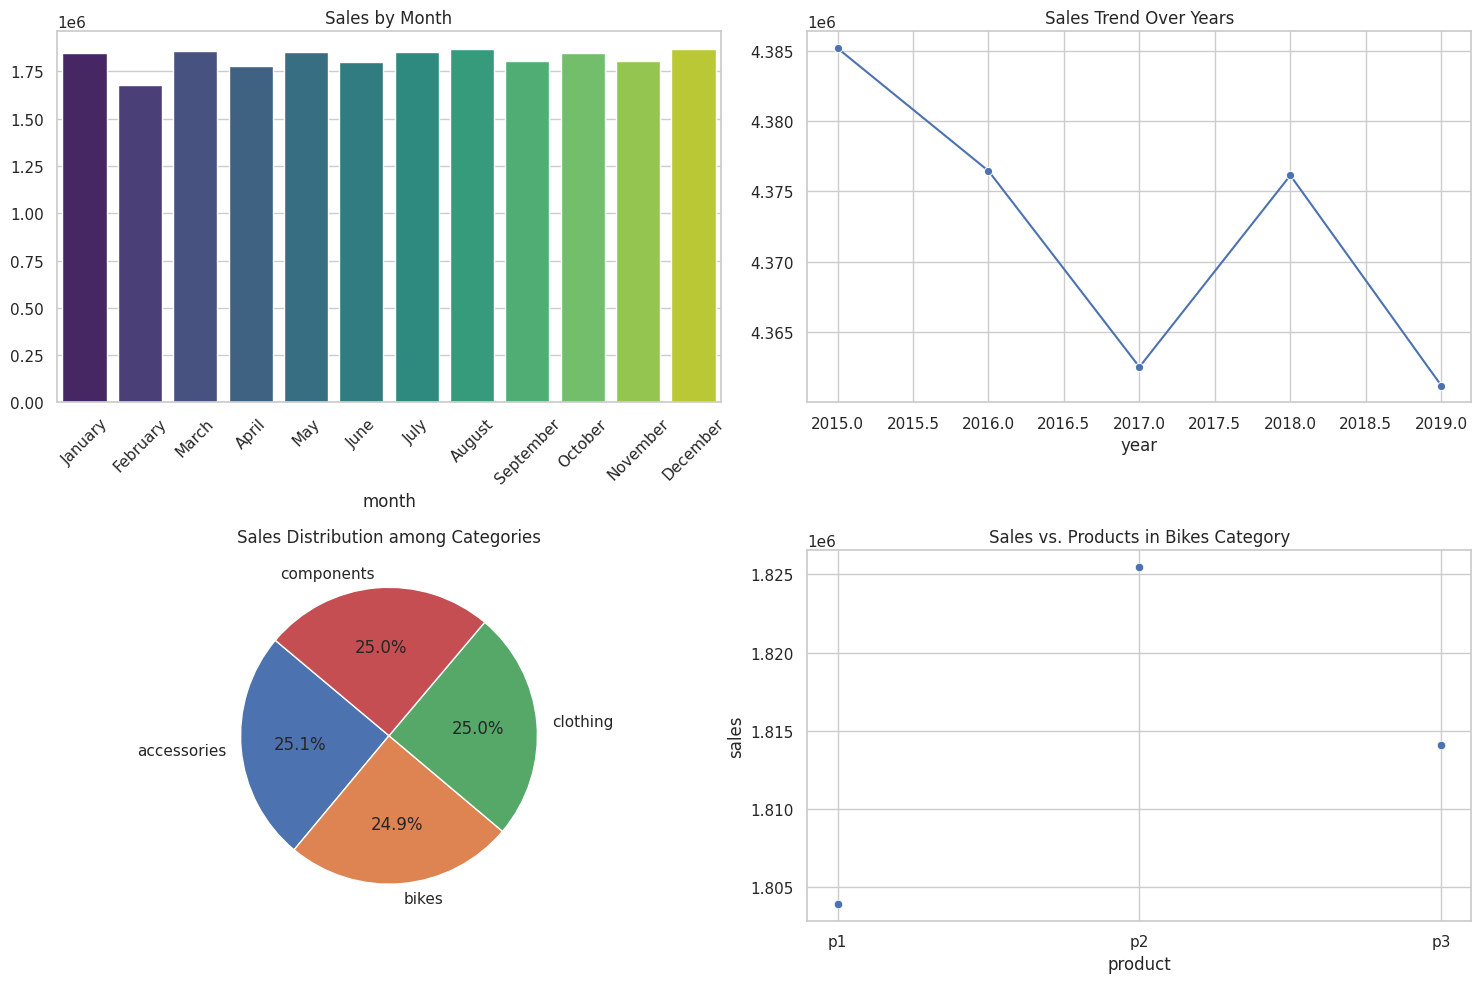

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Preparing data for different types of charts

# 1. Sales by Month (Bar Chart)
monthly_sales = data.groupby('month').sales.sum().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

# 2. Sales Trend Over Years (Line Chart)
yearly_sales = data.groupby('year').sales.sum()

# 3. Sales Distribution among Categories (Pie Chart)
category_sales = data.groupby('category').sales.sum()

# 4. Sales vs. Products Scatter Plot (for a specific category, e.g., 'bikes')
bikes_data = data[data['category'] == 'bikes']
scatter_data = bikes_data.groupby('product').sales.sum().reset_index()

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting each chart
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, ax=axs[0, 0], palette="viridis")
axs[0, 0].set_title('Sales by Month')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45)

sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, ax=axs[0, 1], marker='o', color='b')
axs[0, 1].set_title('Sales Trend Over Years')

axs[1, 0].pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Sales Distribution among Categories')

sns.scatterplot(x='product', y='sales', data=scatter_data, ax=axs[1, 1])
axs[1, 1].set_title('Sales vs. Products in Bikes Category')

plt.tight_layout()
plt.show()

In [3]:
!pip install jupyter-dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.8 MB/s eta 0:00:00


In [5]:
# Cài đặt các thư viện cần thiết nếu chưa có
# !pip install pandas plotly

import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from jupyter_dash import JupyterDash

# Load dữ liệu
# Thay thế 'YOUR_DATASET_FILE_PATH_HERE.csv' bằng đường dẫn đến file dữ liệu của bạn
data = pd.read_csv('/content/dataset.csv')

# Tạo ứng dụng Dash
app = JupyterDash(__name__)

# Thiết lập layout cho ứng dụng
app.layout = html.Div([
    html.H1("Sales Dashboard"),

    html.Label("Select Year:"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in sorted(data['year'].unique())],
        value=sorted(data['year'].unique()),
        multi=True
    ),

    html.Label("Select Category:"),
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': category, 'value': category} for category in data['category'].unique()],
        value=data['category'].unique(),
        multi=True
    ),

    dcc.Graph(id='sales-graph')
])

# Callback để cập nhật biểu đồ
@app.callback(
    Output('sales-graph', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('category-dropdown', 'value')]
)
def update_graph(selected_years, selected_categories):
    filtered_data = data[data['year'].isin(selected_years) & data['category'].isin(selected_categories)]
    sales_by_region = filtered_data.groupby('state').sales.sum().reset_index()

    fig = px.bar(sales_by_region, x='state', y='sales', title='Sales by Region')
    return fig

# Chạy ứng dụng
# Sử dụng mode='inline' để hiển thị ứng dụng trực tiếp trong notebook
app.run_server(mode='inline')

/usr/local/lib/python3.10/dist-packages/dash/dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
df = pd.read_csv('/content/dataset.csv')
df

,year,month,day,country,state,city,store,category,product,sales
0,2015,January,1,US,CO,Boulder,COSTCO,bikes,p1,275
1,2015,January,1,US,CO,Boulder,COSTCO,bikes,p2,356
2,2015,January,1,US,CO,Boulder,COSTCO,bikes,p3,212
3,2015,January,1,US,CA,San Jose,COSTCO,bikes,p1,186
4,2015,January,1,US,CA,San Jose,COSTCO,bikes,p2,406
...,...,...,...,...,...,...,...,...,...,...
87595,2019,December,31,US,CO,Boulder,REI,components,p11,83
87596,2019,December,31,US,CO,Boulder,REI,components,p12,448
87597,2019,December,31,US,CA,San Jose,REI,components,p10,12
87598,2019,December,31,US,CA,San Jose,REI,components,p11,189


In [14]:
df['state'].unique()

array(['CO', 'CA'], dtype=object)